## GMM Algorithm for classifying Gaussian datapoints into respective clusters 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [57]:
def create_data(var):
    np.random.seed(1)
    x1=np.random.normal(0,var,50)
    x2=np.random.normal(5,var,50)
    x3=np.random.normal(10,var,50)
    X1 = np.concatenate([x1,x2])
    X=np.concatenate([X1,x3])
    np.random.shuffle(X)
    return X,x1,x2,x3

### Create labels for data:

In [58]:
def get_true_label(X):
#true labels
    y=[]
    for i in X:
        if i in x1:
            y.append(0)
        elif i in x2:
            y.append(1)
        else:
            y.append(2)
    y=np.asarray(y)
    return y

### Initialize Initial Mean,Variance and Probability values:
#### Here, means for cluster 1,2 and 3 are 2,3 and 8 respectively. All variances are initialized to 1 and prior probability of a data point belonging to a certain cluster is 1/3 i.e. a data-point may belong to any of the 3 clusters equally.The posterior probability is 0 for all data-points in the clusters.

In [59]:
def initialize():
    #prior probability=1/3
    weights = np.ones((k)) / k
    #randomized initial means
    m = np.asarray([2.,3.,8.]) 
    #initial variances:
    v=[1.,1.,1.]
    #posterior probability that each input belongs to each of the 3 gaussians
    probability=np.zeros((len(X),k),dtype=float)
    return m, v,weights,probability

### Expectation-Maximization Algorithm: Takes X,y,Variance as input and tries to predict the GMM where the data point belongs 

In [60]:
N=len(X)
k=3
def EM(X,y,real_var):
    
    pie=math.pi
    iterations=5
    epochs=range(1,iterations+1)
    real_mean=[0,5,10]
    acc=[]
    #initialize mean,variance,prior probability, posterior probability
    means,variances,w,likelihood=initialize()
    
    for step in range(iterations):
        pred_means=[]
        pred_var=[]
        
        #Expection Step : Calculating Posterior probabilities
        for i in range(N):
            for j in range(k):
                likelihood[i][j]=w[j]*((1/math.sqrt(2*pie*(variances[j]))) * (np.exp((-1./2.)*((X[i]-means[j])**2.)/(variances[j]))))
            
            likelihood[i]=likelihood[i]/np.sum(likelihood[i])
            
        #Maximization Step: update values of the means, variances and prior probabilities
        for i in range(k):
            w[i]=np.sum(likelihood[:,i])/N
            means[i]=np.dot(likelihood[:,i],X[:].T)/(np.sum(likelihood[:,i]))
            variances[i]=np.dot(likelihood[:,i],((X-means[i])**2).T)/(np.sum(likelihood[:,i]))
           
        #prediction of cluster
        cluster=[]
        for i in range(N):
            cluster.append(np.argmax(likelihood[i]))
            
        print("Epoch",step+1)
        print("Mean squared Error for means: "+str(mean_squared_error(real_mean,means)))
        print("Mean squared Error for variance: "+str(mean_squared_error(real_var,variances)))
        a=accuracy_score(y,cluster)*100
        acc.append(a)
        print("Overall accuracy score: "+str(a)+"%")
        
        print("Number of samples classifed for Gaussian Models 1: ",cluster.count(0))
        print("Number of samples classifed for Gaussian Models 2: ",cluster.count(1))
        print("Number of samples classifed for Gaussian Models 3: ",cluster.count(2))
    plt.plot(epochs,acc,'g')
    plt.title('Accuracy of Training')        
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
        
        
        


### Different Model Configurations and their Outputs:

In [61]:
X,x1,x2,x3=create_data(1)

### Data Visualization for Input Gaussian Models 
#### Variance=1. Means=0,5,10

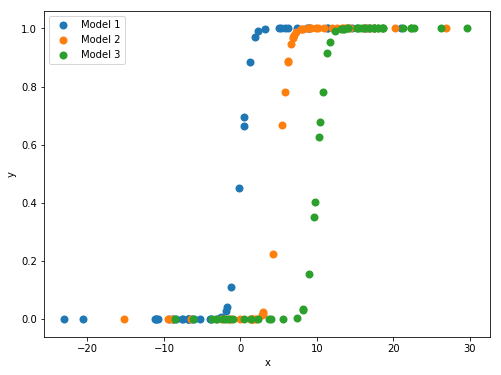

In [71]:
import scipy.stats as ss
x=np.linspace(-6,6,400)
y=np.linspace(-6,6,400)
fig,ax=plt.subplots(1,1,figsize=(8,6))
x,y=np.meshgrid(x,y)

plt.xlabel('x')
plt.ylabel('y')

mu1 = 0
mu2=5
mu3=10
sigma = 1

y1 = ss.norm.cdf(x1, mu1, sigma) 
y2 = ss.norm.cdf(x2, mu2, sigma) 
y3 = ss.norm.cdf(x3, mu3, sigma)
plt.scatter(x1, y1, label='Model 1',lw=2)
plt.scatter(x2, y2, label='Model 2',lw=2)
plt.scatter(x3, y3, label='Model 3',lw=2)
plt.legend()
plt.show()

Epoch 1
Mean squared Error for means: 0.5209166023494022
Mean squared Error for variance: 4.073187457423945
Overall accuracy score: 90.0%
Number of samples classifed for Gaussian Models 1:  50
Number of samples classifed for Gaussian Models 2:  35
Number of samples classifed for Gaussian Models 3:  65
Epoch 2
Mean squared Error for means: 0.2342519750874054
Mean squared Error for variance: 2.822487343836046
Overall accuracy score: 96.0%
Number of samples classifed for Gaussian Models 1:  50
Number of samples classifed for Gaussian Models 2:  44
Number of samples classifed for Gaussian Models 3:  56
Epoch 3
Mean squared Error for means: 0.08778972278480357
Mean squared Error for variance: 1.3210021134609244
Overall accuracy score: 98.66666666666667%
Number of samples classifed for Gaussian Models 1:  50
Number of samples classifed for Gaussian Models 2:  48
Number of samples classifed for Gaussian Models 3:  52
Epoch 4
Mean squared Error for means: 0.014528654116300397
Mean squared Erro

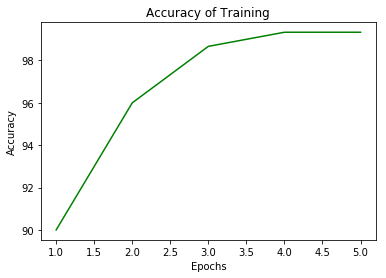

In [63]:
y=get_true_label(X)
real_var=[1,1,1]
EM(X,y,real_var)

Epoch 1
Mean squared Error for means: 0.5909022146884005
Mean squared Error for variance: 4.014165217519089
Overall accuracy score: 88.0%
Number of samples classifed for Gaussian Models 1:  49
Number of samples classifed for Gaussian Models 2:  34
Number of samples classifed for Gaussian Models 3:  67
Epoch 2
Mean squared Error for means: 0.3164266524332999
Mean squared Error for variance: 3.428734767320283
Overall accuracy score: 92.0%
Number of samples classifed for Gaussian Models 1:  49
Number of samples classifed for Gaussian Models 2:  40
Number of samples classifed for Gaussian Models 3:  61
Epoch 3
Mean squared Error for means: 0.1761738769358471
Mean squared Error for variance: 2.338764254686493
Overall accuracy score: 95.33333333333334%
Number of samples classifed for Gaussian Models 1:  49
Number of samples classifed for Gaussian Models 2:  45
Number of samples classifed for Gaussian Models 3:  56
Epoch 4
Mean squared Error for means: 0.07291942096595021
Mean squared Error f

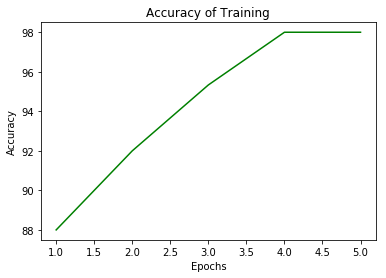

In [66]:
X,x1,x2,x3=create_data(1.2)

y=get_true_label(X)
real_var=[1.2,1.2,1.2]
EM(X,y,real_var)

Epoch 1
Mean squared Error for means: 0.7008317013402324
Mean squared Error for variance: 5.62289675745258
Overall accuracy score: 76.66666666666667%
Number of samples classifed for Gaussian Models 1:  46
Number of samples classifed for Gaussian Models 2:  31
Number of samples classifed for Gaussian Models 3:  73
Epoch 2
Mean squared Error for means: 0.5638847158318119
Mean squared Error for variance: 7.005367665889846
Overall accuracy score: 78.0%
Number of samples classifed for Gaussian Models 1:  45
Number of samples classifed for Gaussian Models 2:  33
Number of samples classifed for Gaussian Models 3:  72
Epoch 3
Mean squared Error for means: 0.5008925810393295
Mean squared Error for variance: 7.378163663083797
Overall accuracy score: 79.33333333333333%
Number of samples classifed for Gaussian Models 1:  45
Number of samples classifed for Gaussian Models 2:  37
Number of samples classifed for Gaussian Models 3:  68
Epoch 4
Mean squared Error for means: 0.45919447333477187
Mean squ

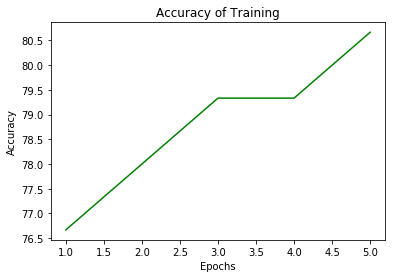

In [67]:
X,x1,x2,x3=create_data(2.3)
real_var=[2.3,2.3,2.3]
y=get_true_label(X)
EM(X,y,real_var)